In [1]:
print("hello")

hello


In [3]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import random
import numpy as np
from PIL import Image, ImageDraw

In [16]:
# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])

mnist_data = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)

In [17]:
# Function to add a rectangular patch
def add_patch(image, patch_size=(5, 5), patch_value=255, patch_x=0, patch_y=0):
    # Convert the image from tensor to PIL
    image_pil = transforms.ToPILImage()(image)
    draw = ImageDraw.Draw(image_pil)
    
    # Randomly select the position of the patch
    width, height = image_pil.size
    # patch_x = random.randint(0, width - patch_size[0])
    # patch_y = random.randint(0, height - patch_size[1])

    # Define the rectangle patch area (patch_x, patch_y, patch_x+width, patch_y+height)
    patch_area = [patch_x, patch_y, patch_x + patch_size[0], patch_y + patch_size[1]]

    # Draw the patch as a white rectangle (255 for white in grayscale)
    draw.rectangle(patch_area, fill=patch_value)

    # Convert the image back to tensor
    return transforms.ToTensor()(image_pil)


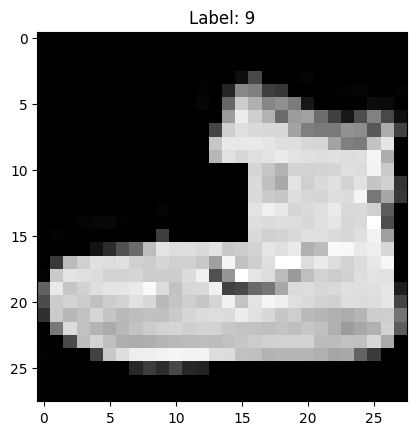

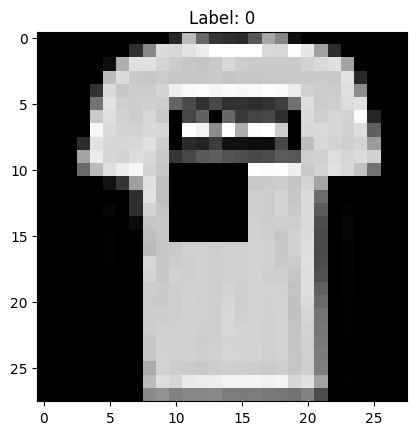

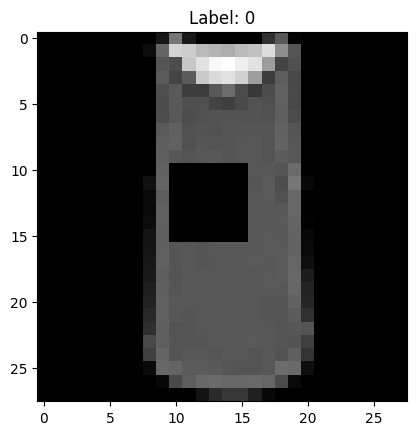

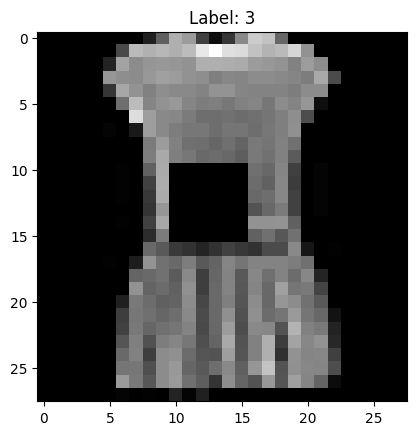

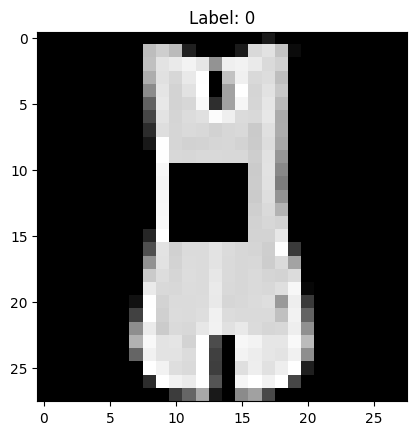

In [18]:
# Modify dataset by adding patches
modified_images = []
for i, (image, label) in enumerate(mnist_data):
    modified_image = add_patch(image,patch_value=0, patch_x=10, patch_y=10)
    modified_images.append((modified_image, label))
    
    # For demonstration, show the first 5 images
    if i < 5:
        plt.imshow(modified_image.squeeze(), cmap="gray")
        plt.title(f"Label: {label}")
        plt.show()
